<a href="https://colab.research.google.com/github/eodnsl41/abcd/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
x= 5*np.random.randn(500) #k means 클러스터링 할 때 모든 점을 데이터로 설정. 넘파이를 이용해서 생성. 500개 랜덤으로 생성. 평균 0 표준편자 1. 너무 중앙에 모여있지 않도록 5랑 2 곱해줌
y= 2*np.random.randn(500) #
feature = np.zeros((500, 2)) #500x2 의 역행렬 / feature를 담아줄 행렬
feature[:,0]= x #첫번째 열에 x를 넣어줌
feature[:,1]= y #두번째 열에 y를 넣어줌

num_data = np.size(feature, 0) #shape이 (m,n) 이라면 size는 m*n. 행의 개수
num_feature = np.size(feature, 1) #갖고있는 feature가 몇개가 있는지. 열의 개수

print(f'number of data : {num_data}') #data 개수
print(f'number of feature : {num_feature}') #feature 개수

number of data : 500
number of feature : 2


plot the input data




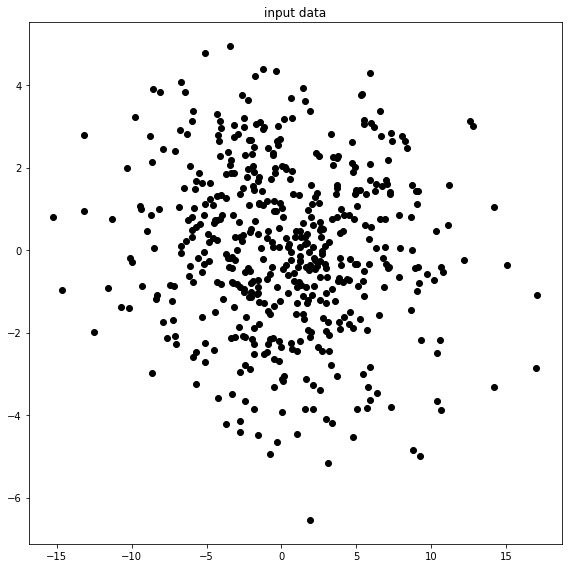

In [52]:
plt.figure(figsize=(8,8)) #size 설정
plt.title('input data')

plt.scatter(x,y,color='black') #산점도. x좌표 y좌표

plt.tight_layout() #산점도에 맞게 크기 맞춰준 것
plt.show() #오브젝트 만든거 그림 그려줌

In [53]:
cluster_k = 4 #데이터 위에서 만든거고, 몇개로 나눠야 할 지 처음에 정해주는 것. 클러스터의 개수
iteration = 10 #알고리즘을 학습해야 할 횟수 = 10

#아래부분은 알고리즘에서 필요한 부분은 아님.
#총 4개의 매트릭스를 만듦
loss = np.zeros(iteration) 
#잘 수렴하는지 확인하기 위해 loss 사용 
#각각의 반복 횟수마다 로스를 계산을 해서 매트릭스 채울거임. (총 10개의 로스가 생기는거)
#지금 계산 말고 영향력만 만들어두는 것 (10 by 1의 영향력을 만들음)
#로스의 행렬 생김
center_iteration = np.zeros((iteration, cluster_k, num_feature)) 
#center 점이 어떻게 이동하는지 확인
#반복 횟수만큼, 클러시터의 개수 만큼, 피처의 개수 (x, y) (아까 위에서 num_feature = np.size(feature,1) 한거.)
#center point를 저장할 수 있는 영행렬이 완성됨
label_pred = np.random.randint(0, cluster_k, size=(num_data)) 
#센터포인트의 알고리즘 끝나고 센터포인트랑 가까운점을 바탕으로 data pointer들이 새로운 라벨로 갱신됨. 센터포인트 를 다시 평균값으로 갱신
#센터포인트의 숫자에 따라 라벨 갱신
#처음에는 센터포인트를 계산하기 위해 값을 임의로 넣어줌
#(시작 숫자, 끝나는 숫자, 매트릭스 크기)
#0과 1사이의 숫자가 뽑힘
#어떤 숫자는 0이고 어떤숫자는 1임. 센터포인트의 평균점 계산할거임. 1인 것들끼리 모여서 센터포인트 만들거임
#사이즈는 모든 데이터의 개수만큼 있어야 함
distance = np.zeros((num_data, cluster_k)) 
#라벨 다시 갱신함.
#데이터포인트랑 센터포인트까지의 거리 계산.
#평균 아님, 각각의 거리가 필요한거. (센터포인트 1, 2)

#필요한 매트릭스들 정의 함

In [ ]:
#center point를 처음에 랜덤으로 주고 시작하는거랑 0으로 주고 시작하는거랑 차이
#rabel prediction을 랜덤
#랜덤을 주고 센터포인터를 0으로 시작
#라벨프레딕션을 0으로 넣어놓고 센터포인트를 랜덤으로 주고 시작하느냐

#center = np.zeros(shape=(cluster_k, num_feature))

#for num in range(cluster_k):
 #   rand=np.random.randint(0, feature.shape[0]-1)
 #   center[num] = feature[rand]
 #   print(feature[rand])

#실행시키면 센터포인트 랜덤으로 찍히는거 확인할 수 잇음

compute center

In [40]:
#알고리즘 실행시키는 방법
#label_pred = np.random.randint(0, cluster_k, size=(num_data)) 

center = np.zeros(shape=(cluster_k, num_feature))
#센터포인트의 영행렬 만듦 (2*2)
#아까 라벨프레딕션 랜덤하게 만들어서 지금 모든 데이터는 라벨을 랜덤하게 갖고있음

cluster_1 = feature[np.where(label_pred ==0)]
center[0] = np.sum(cluster_1, axis=0) / len(cluster_1) #포인터들의 평균 구하기
#np.where 에서 라벨프레딕션에서 0값들의 인덱스만 고름
#0라벨을 갖고있는 포인터 점들만 cluster에 들어감.
#axis =0 : 각각의 x, y의 평균을 구하는거기 때문에.

cluster_2 = feature[np.where(label_pred == 1)]
center[1] = np.sum(cluster_2, axis=0) / len(cluster_2)

center #첫번째 센터가 계산됨

array([[ 1.02217534, -0.14442151],
       [ 0.07085611,  0.06459084],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [ ]:
label_pred
#각각이 데이터 포인터들.
#0,1 이 라벨

compute distance

In [41]:
#distance = np.zeros((num_data, cluster_k))

loss_1 = np.sum((feature-center[0])**2, 1) 
#유클리안 거리공식 이용 -> 제곱
#(모든 데이터 포인터 - 1번 센터 포인트) 의 합
# 1은 axis =1
loss_2 = np.sum((feature-center[1])**2, 1)

loss_1.shape, loss_2.shape
#거리를 구하는 것의 합. 거리만 500개 있는거임. 


((500,), (500,))

In [ ]:
loss_1, loss_2

In [42]:
distance = np.zeros((num_data, cluster_k)) 
distance[: ,0] = loss_1
distance[: ,1] = loss_2
#각각의 열에 들어가겠죠

label assign

In [43]:
#구한 거리를 바탕으로 라벨을 갱신시킴
#거리가 가까운 센터포인트 쪽으로 갱신을 해야겠죠 -> np.argmin (센터포인트 2개 값을 비교함. 가까운거 남김)

label_pred = np.zeros(shape=(num_data)) #
label_pred = np.argmin(distance, axis = 1) #
label_pred

#처음에는 랜덤으로 넣어줬지만 가까운 센터포인트들의 라벨로 할당이 될 것

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

iteration

In [46]:
#한번에 알고리즘 수행

center = np.zeros(shape=(cluster_k, num_feature)) #매트릭스 공간 영행렬로 만듦
temp_center = np.zeros(shape=(cluster_k, num_feature))
distance = np.zeros((num_data, cluster_k)) 

for i in range(iteration): #이터레이션 횟수
    for j in range(cluster_k): #cluster_k = 2
        cluster = feature[np.where(label_pred==j)] #j=0 j=1 #데이터포인터의 인덱스
        center[j] = np.sum(cluster, axis =0) / len(cluster) #평균 계싼
        distance[:,j]= np.sum((feature - center[j])**2 , axis =1)

    label_pred = np.argmin(distance, axis=1)
    
    loss[i] = np.sum(distance[range(num_data), label_pred]) / num_data #수렴 정도 확인
    center_iteration[i] = center #센터포인트



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [55]:
loss
#수렴하는거 볼 수 있음

array([28.65489807, 11.80367963,  9.44993856,  8.00721102,  7.45372925,
        7.37015267,  7.33072285,  7.29457044,  7.28621401,  7.28517694])

In [29]:
center_iteration #센터포인트
#첫부분에는 많이 변하는데 갈수록 안변함

array([[[ 3.85418993, -0.54736304],
        [-4.34129538,  0.51010812]],

       [[ 4.22760899, -0.22976011],
        [-4.29882653,  0.18542222]],

       [[ 4.34802107, -0.19263689],
        [-4.21155521,  0.1454293 ]],

       [[ 4.40683084, -0.17721082],
        [-4.16624601,  0.12923496]],

       [[ 4.4267677 , -0.16018998],
        [-4.15134652,  0.11442596]],

       [[ 4.4267677 , -0.16018998],
        [-4.15134652,  0.11442596]],

       [[ 4.4267677 , -0.16018998],
        [-4.15134652,  0.11442596]],

       [[ 4.4267677 , -0.16018998],
        [-4.15134652,  0.11442596]],

       [[ 4.4267677 , -0.16018998],
        [-4.15134652,  0.11442596]],

       [[ 4.4267677 , -0.16018998],
        [-4.15134652,  0.11442596]]])

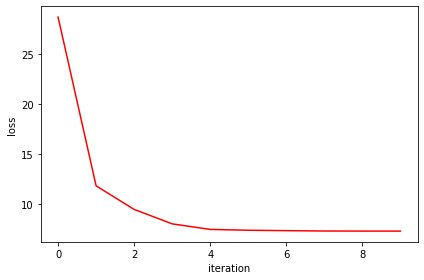

In [56]:
plt.plot(loss, '-', color='red') #loss 값을 넣어줌
plt.xlabel('iteration')
plt.ylabel('loss')

plt.tight_layout()
plt.show()
#로스 수렴 확인됨

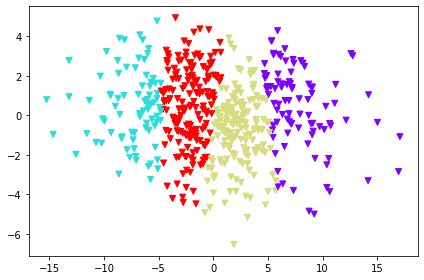

In [57]:
plt.scatter(feature[:,0], feature[:,1], marker ='v', c= label_pred, cmap = 'rainbow') 
#(x, y, 마커, c값 -> 라벨에 따라서 색깔을 다르게 넣어줌, c맵은 레인보우순으로 색깔을 다르게 넣어줌)
plt.tight_layout()
plt.show()

In [ ]:
#temp_center = np.zeros(shape=(cluster_k, num_feature))
#center pointer 가 없어지는 경우도 있다.
#그것에 대한 방지책

In [48]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? ㅛ
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [54]:
center = np.zeros(shape=(cluster_k, num_feature))
distance= np.zeros(shape = (num_data, cluster_k))
temp_center = np.zeros(shape = (cluster_k, num_feature))

for i in range(iteration):
    for j in range(cluster_k): #cluster_k=2
        cluster = feature[np.where(label_pred == j)]
        if len(feature[label_pred == j]) > 0:
            center[j] = np.sum(cluster, axis = 0) / len(cluster)
        else:
            center[j] = temp_center[j] #없어진다면 다른거 가져와서 씀

        distance[:,j] = np.sum((feature - center[j])**2, axis = 1)
    temp_center = center
    label_pred = np.argmin(distance, axis=1)

    loss[i] = np.sum(distance[range(num_data), label_pred]) / num_data
    center_iteration[i] = center

sickit library를 사용한 k-means clustering

In [59]:
#완전 간단하게 하는 방법

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)

In [60]:
kmeans.fit(feature) #데이터 불러옴. fit은 학습을 시킨다는 뜻

KMeans(n_clusters=10)

In [61]:
label_sklearn = kmeans.predict(feature) #라벨에 predition 함

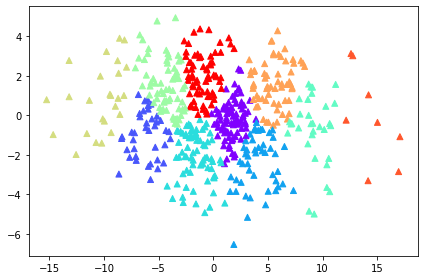

In [64]:
plt.scatter(feature[:,0], feature[:,1], marker = '^', c= label_sklearn, cmap = 'rainbow')

plt.tight_layout()
plt.show()